In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_pca_correlation_graph
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
from sklearn.linear_model import LassoCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn import metrics
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/optdigit/optdigits.csv
/kaggle/input/wine-quality-selection/winequality-red.csv
/kaggle/input/wine-quality-selection/winequality-white.csv


In [2]:
#Charger les données 
opt = pd.read_csv('/kaggle/input/optdigit/optdigits.csv')
data_red = pd.read_csv('/kaggle/input/wine-quality-selection/winequality-red.csv',sep=',')
data_white = pd.read_csv('/kaggle/input/wine-quality-selection/winequality-white.csv',sep=',')



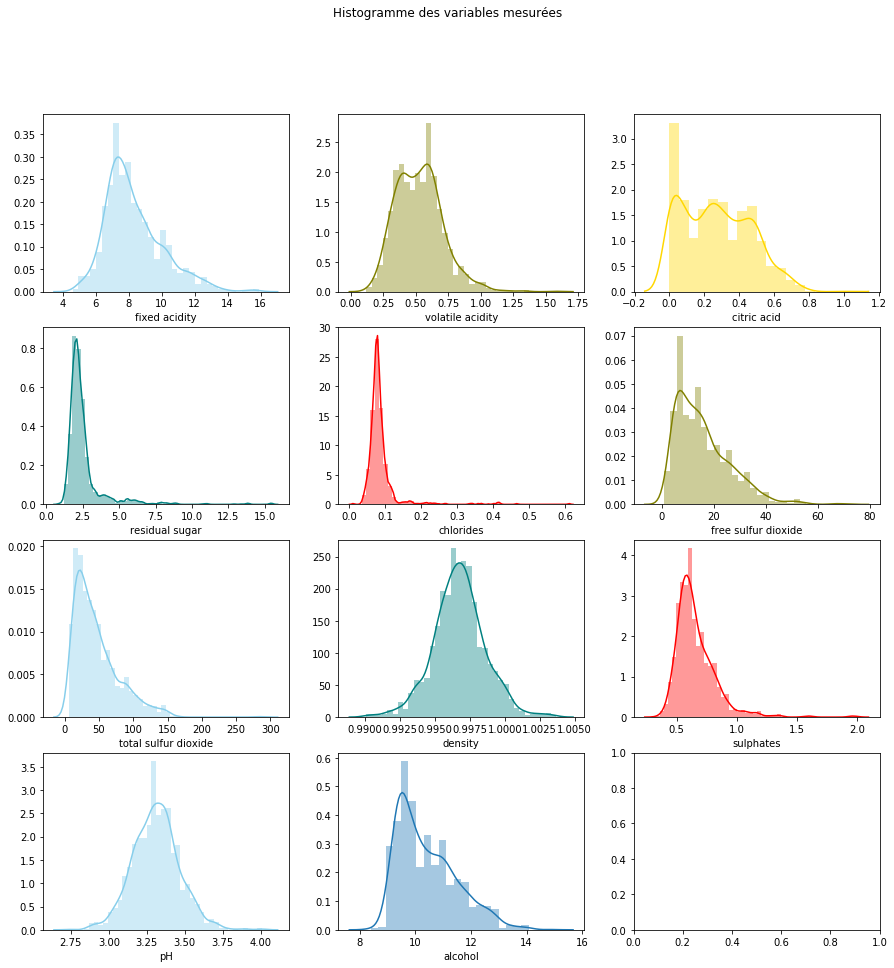

In [3]:
#Afficher les histogrammes des grandeurs mesurées

f, axes = plt.subplots(4,3,figsize = (15,15))
plt.suptitle('Histogramme des variables mesurées')

sns.distplot(data_red['fixed acidity'],color='skyblue' ,ax=axes[0,0])
sns.distplot(data_red['volatile acidity'],color='olive',ax=axes[0,1])
sns.distplot(data_red['citric acid'],color='gold',ax=axes[0,2])
sns.distplot(data_red['residual sugar'],color='teal',ax=axes[1,0])
sns.distplot(data_red['chlorides'],color='red',ax=axes[1,1])
sns.distplot(data_red['free sulfur dioxide'],color='olive',ax=axes[1,2])
sns.distplot(data_red['total sulfur dioxide'],color='skyblue',ax=axes[2,0])
sns.distplot(data_red['density'],color='teal',ax=axes[2,1])
sns.distplot(data_red['sulphates'],color='red',ax=axes[2,2])
sns.distplot(data_red['pH'],color='skyblue',ax=axes[3,0])
sns.distplot(data_red['alcohol'],ax=axes[3,1])

plt.savefig('Histogramme.png')
                      

In [4]:
#Enlever les valeurs aberrantes 
#Calcul de la moyenne et de l'écart type des grandeurs mesurées

mfa = data_red['fixed acidity'].mean()
std_fa = data_red['fixed acidity'].std()

mva = data_red['volatile acidity'].mean()
std_va = data_red['volatile acidity'].std()

mca = data_red['citric acid'].mean()
std_ca = data_red['citric acid'].std()

mc = data_red['chlorides'].mean()
std_c = data_red['chlorides'].std()

mfsd = data_red['free sulfur dioxide'].mean()
std_fsd = data_red['free sulfur dioxide'].std()

mtsd = data_red['total sulfur dioxide'].mean()
std_tsd = data_red['total sulfur dioxide'].std()

md = data_red['density'].mean()
std_d = data_red['density'].std()

ms = data_red['sulphates'].mean()
std_s = data_red['sulphates'].std()

mp = data_red['pH'].mean()
std_p = data_red['pH'].std()

ma = data_red['alcohol'].mean()
std_a = data_red['alcohol'].std()

mrs = data_red['residual sugar'].mean()
std_rs = data_red['residual sugar'].std()

# On ne garde que les vins non aberrants 
outliers_free = data_red.loc[(abs(data_red['fixed acidity']-mfa)<3*std_fa) & (abs(data_red['volatile acidity']-mva)<3*std_va) & (abs(data_red['citric acid']-mca)<3*std_ca) & (abs(data_red['chlorides']-mc)<3*std_c) & (abs(data_red['free sulfur dioxide']-mfsd)<3*std_fsd) & (abs(data_red['total sulfur dioxide']-mtsd)<3*std_tsd) & (abs(data_red['density']-md)<3*std_d) & (abs(data_red['sulphates']-ms)<3*std_s) & (abs(data_red['pH']-mp)<3*std_p) & (abs(data_red['alcohol']-ma)<3*std_a) & (abs(data_red['residual sugar']-mrs)<3*std_rs)]
print(outliers_free)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

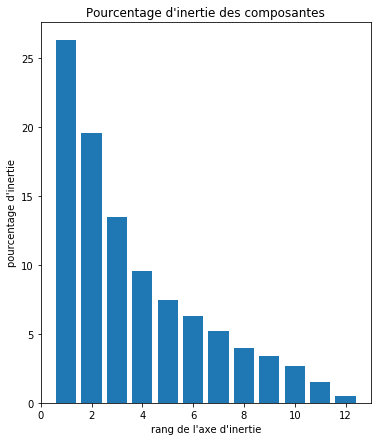

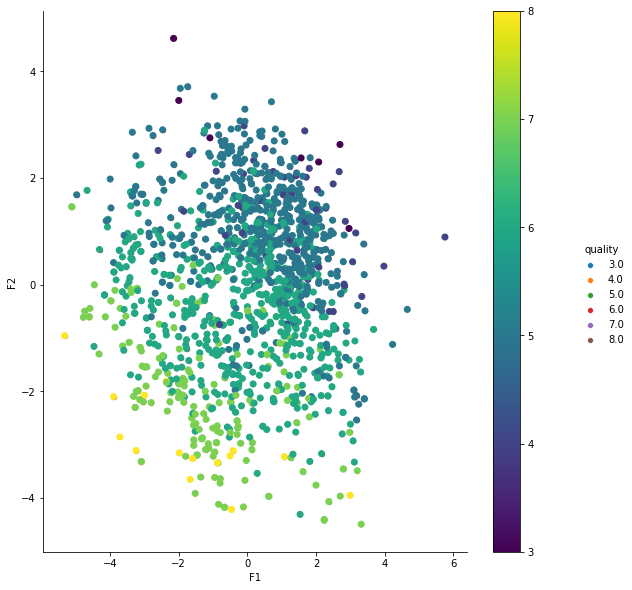

In [5]:
# Analyse en composant principal

# On centre et réduit les données 
data_scaled = preprocessing.scale(outliers_free, axis = 0)

#PCA avec les 2 premiers axes
pca = PCA(n_components = 12)

#ACP 
pca.fit(data_scaled)


#Pourcentage d'inertie portée par chaque axe
plt.figure(figsize=(13,7))
plt.subplot(1,2,1)
variance = pca.explained_variance_ratio_*100
plt.bar(range(1,13),variance)
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Pourcentage d'inertie des composantes")

#Projection sur les 2 axes des vins 

projection = pca.transform(data_scaled)[:,0:2]
pairplot = pd.DataFrame(data = projection, columns=["F1","F2"])
pairplot['quality']= outliers_free['quality']
sns.pairplot(x_vars='F1', y_vars='F2',data = pairplot,hue = 'quality', height = 8)

#Deuxieme façon de faire pour la projection, avec la couleur bar 
plt.scatter(projection[:,0],projection[:,1],c=outliers_free['quality'])
plt.colorbar()
plt.savefig('ACP1.png')

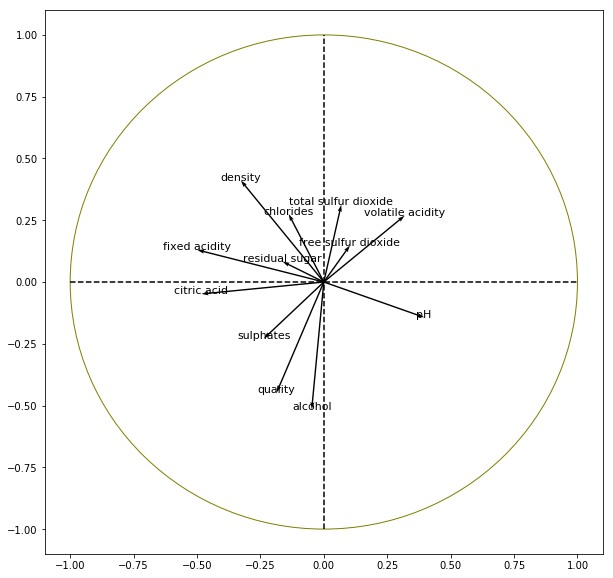

In [6]:
#Cercle des corrélations 

#Nom des variables
features = data_red.columns.tolist()

#Matrice des composants et leur coordonnées sur les variables 
pcs = pca.components_

fig, ax = plt.subplots(figsize=(10,10))

#Affichage des flèches ( on veut afficher les variables sur les 2 premières composantes - les lignes sont les vecteurs propres et colonnes les variables initiales)
plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),pcs[0,:], pcs[1,:],width=0.0025,angles='xy', scale_units='xy', scale=1, color="black")

#Affichage du cercle 
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='olive')
fig = plt.gcf()
ax = fig.gca()
ax.add_artist(circle)

#Les axes principaux sont affichés
plt.plot([-1, 1], [0, 0], color='black',ls='--')
plt.plot([0, 0], [-1, 1], color='black', ls='--')  

for i,(x, y) in enumerate(pcs[[0,1]].T):
       plt.text(x,y, data_red.columns[i], fontsize='11', ha='center', color="black")

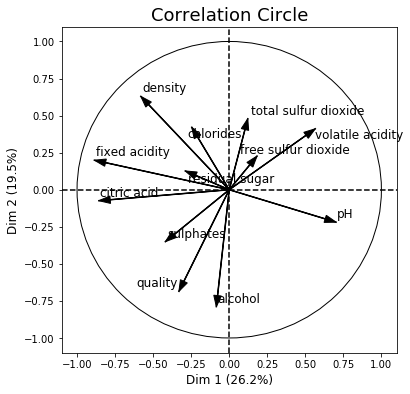

In [7]:
#Cercle des corrélations avec fonction de mlxtend
features_projection = pcs[:2,:]
features_projection
plot_pca_correlation_graph(data_scaled,features)

plt.savefig('cercle.png')

In [8]:
#Regression multilineaire avec X réduit et centré
X = data_scaled[:,0:11]
Y = data_scaled[:,11]
lr = LinearRegression().fit(X,Y)

print("lr.coef_normalisé:{}".format(lr.coef_))
print("lr.intercept_normalisé:{}".format(lr.intercept_))
print("R2:{}".format(round(lr.score(X,Y),2)))


#Regression multilineaire avec X réduit
moyenne = np.ones((1458,1))
data_centre = np.array(outliers_free) - np.dot(moyenne,np.array([np.mean(outliers_free)]))
Xreduit = data_centre[:,0:11]
Yreduit = data_centre[:,11]

lr = LinearRegression().fit(Xreduit,Yreduit)

print("lr.coef_centre:{}".format(lr.coef_))
print("lr.intercept_centre:{}".format(lr.intercept_))
print("R2:{}".format(round(lr.score(Xreduit,Yreduit),2)))

lr.coef_normalisé:[ 0.03140599 -0.18874926 -0.06604772  0.00957594 -0.03607474  0.03637724
 -0.11385514 -0.04025063 -0.11467214  0.2317629   0.37412135]
lr.intercept_normalisé:1.6552503188834316e-15
R2:0.38
lr.coef_centre:[ 1.52703270e-02 -8.92354837e-01 -2.76633543e-01  8.86559871e-03
 -1.36204294e+00  3.12765835e-03 -3.10088996e-03 -1.87667627e+01
 -6.51290314e-01  1.43094996e+00  2.93364653e-01]
lr.intercept_centre:-3.6984691457043605e-16
R2:0.38


lasso.coef_:[-0.         -0.1745958  -0.00680019 -0.01167859 -0.08041203  0.00252401
 -0.08580226 -0.         -0.09365103  0.17333647  0.39768685]
        alpha       MSE
0    1.000000  1.051958
1    0.998999  1.051958
2    0.997998  1.051958
3    0.996997  1.051958
4    0.995996  1.051958
..        ...       ...
995  0.004014  0.717863
996  0.003013  0.718081
997  0.002012  0.717813
998  0.001011  0.717466
999  0.000010  0.717298

[1000 rows x 2 columns]
R2:0.38


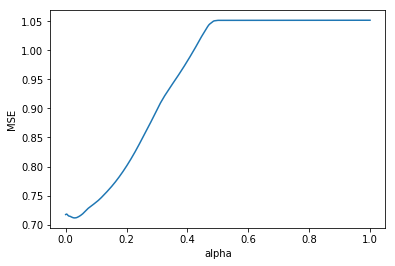

In [9]:
#Lasso regression 
#Séparation du jeu de données 

datatrain,datatest = train_test_split(data_scaled,train_size=500)

regLasso = Lasso(alpha = 0.02)

Xtrain = datatrain[:,0:11]
Ytrain = datatrain[:,11]
Xtest = datatest[:,0:11]
Ytest = datatest[:,11]

#Apprentissage
lasso = regLasso.fit(Xtrain,Ytrain)
print("lasso.coef_:{}".format(lasso.coef_))


#Alpha trop grand on a des coefficients tous nuls ! 
#Cross validation pour trouver le bon alpha 
a=np.linspace(0.00001,1,1000)
lassocv = LassoCV(alphas=a,max_iter = 5000, random_state = 10000, cv=10)
lassocv.fit(Xtrain,Ytrain)

       
#Moyenne des MSE sur les CV 
mean_mse = np.mean(lassocv.mse_path_,axis=1)
print(pd.DataFrame({'alpha':lassocv.alphas_,'MSE':mean_mse}))

#Visualisation des MSE en fonction de alpha 
#Peut etre fait plus rapidement avec la fonction validation_curve 
plt.plot(lassocv.alphas_,mean_mse)
plt.show
plt.xlabel('alpha')
plt.ylabel('MSE')

print("R2:{}" .format(round(lasso.score(Xtest,Ytest),2)))

plt.savefig('MSE alpha.png')




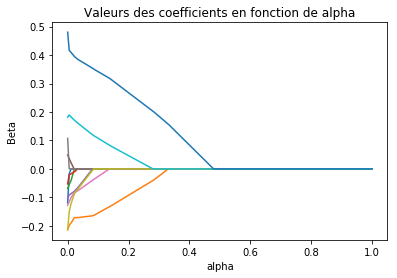

In [10]:
#Affichage des beta_j en fonction des valeurs prises par alpha
beta = np.zeros((1000,11))
for i in range(1000) :
    for j in range(11) :
        lasso_alpha = Lasso(a[i])
        lasso_alpha_train = lasso_alpha.fit(Xtrain,Ytrain)
        beta[i,j] = lasso_alpha_train.coef_[j]

plt.plot(a,beta)
plt.title('Valeurs des coefficients en fonction de alpha')
plt.xlabel('alpha')
plt.ylabel('Beta')

plt.savefig('betaj.png')

In [11]:
#Déterminer le meilleur alpha avec GridSearchCV
param_grid = {'alpha' : a}
grid = GridSearchCV(lasso,param_grid, cv = 10 )
grid.fit(Xtrain,Ytrain)

print("alpha_star :{}" .format(grid.best_params_))


#Prédiction avec le modèle de Ytest_modèle, à comparer avec Ytest, on prend alpha tel que MSE minimum
Ytest_modèle = regLasso.predict(Xtest)

print("MSE_prediction :{}" .format(round(sklearn.metrics.mean_squared_error(Ytest_modèle,Ytest),2)))




alpha_star :{'alpha': 0.029038738738738742}
MSE_prediction :0.61


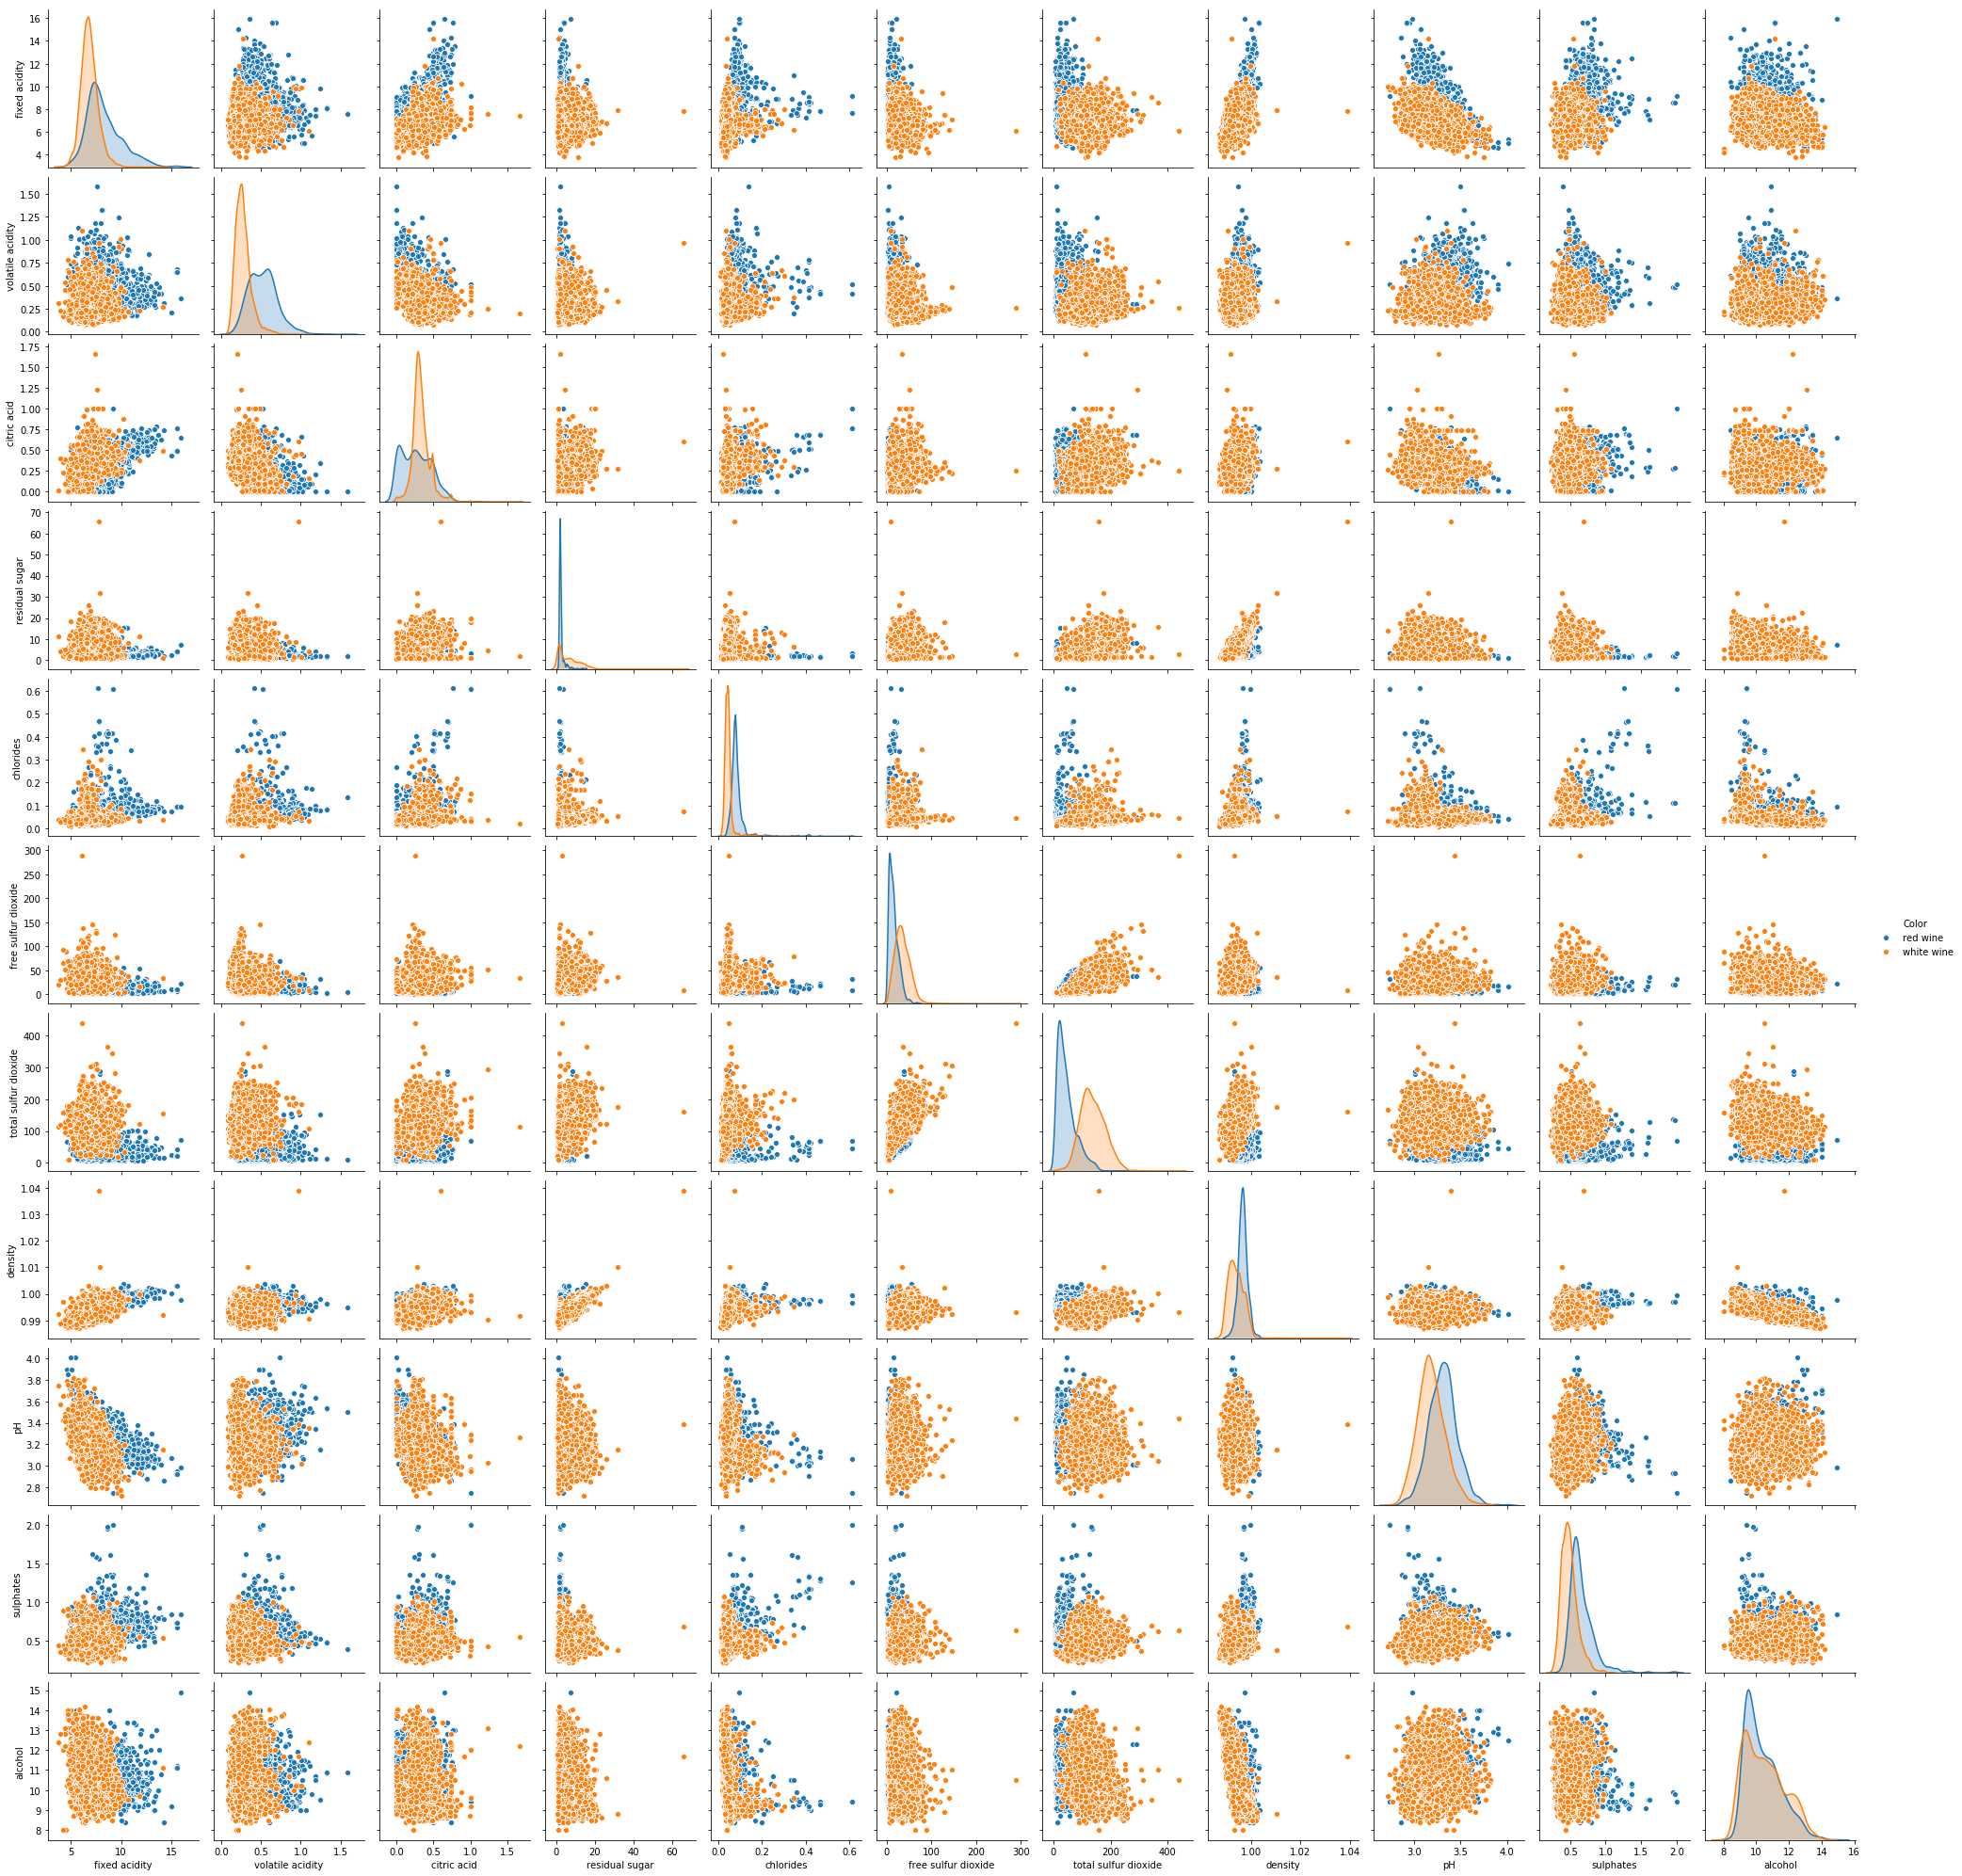

In [12]:
#Classification 
#Ajout d'une colonne donnant la couleur du vin 

data_red['Color']='red wine'
data_white['Color']='white wine'

#Répartition des vins selon les grandeurs
data_concat=pd.concat([data_red,data_white],axis=0)
data_set=data_concat.drop(['quality'],axis=1)
sns.pairplot(data_set, hue='Color')

plt.savefig('pairplot.png')

score_Nbayes :97.2%
score_Mknn :93.7 %
score_Mrfs :99.2 %


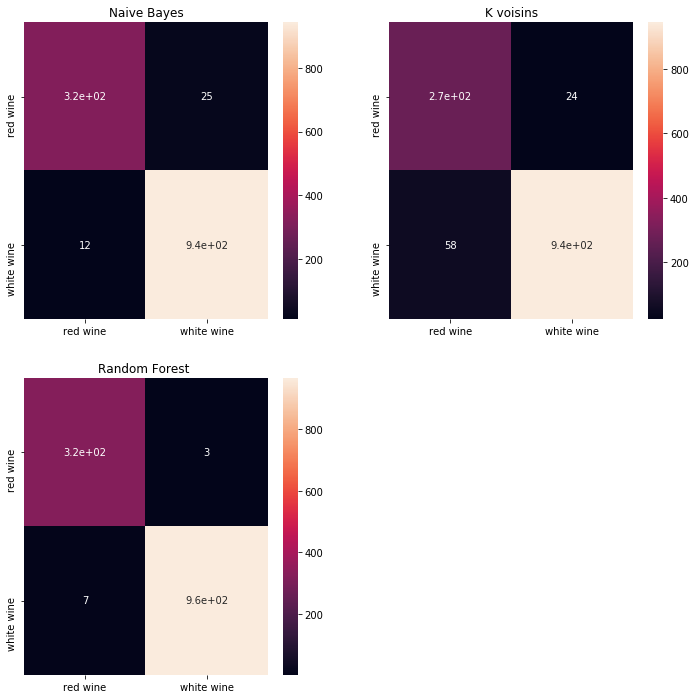

In [13]:
#Classification 

#Séparation des données en test et train 
Train, Test = train_test_split(data_set,train_size=0.8)
target_train = Train['Color']
data_train = Train.drop(['Color'],axis=1)

target_test = Test['Color']
data_test = Test.drop(['Color'],axis=1)

NBayes = GaussianNB()
NBayes.fit(data_train,target_train)
prediction_bayes = NBayes.predict(data_test)
score = sklearn.metrics.accuracy_score(prediction_bayes,target_test)
print("score_Nbayes :{}%".format(round(score*100,1)))

#Analyse du modèle sur données de test avec Naive Bayes 
             
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title('Naive Bayes')
Mbayes = confusion_matrix(prediction_bayes,target_test)
sns.heatmap(Mbayes, annot = True, xticklabels = ['red wine', 'white wine'] ,yticklabels = ['red wine', 'white wine'])


#Avec les voisins 

knn = KNeighborsClassifier(20)
knn.fit(data_train, target_train)

prediction_knn = knn.predict(data_test)
Mknn = confusion_matrix(prediction_knn,target_test)
plt.subplot(2,2,2)
plt.title('K voisins')
sns.heatmap(Mknn, annot = True, xticklabels = ['red wine', 'white wine'] ,yticklabels = ['red wine', 'white wine'])
score1 = sklearn.metrics.accuracy_score(prediction_knn,target_test)
print("score_Mknn :{} %".format(round(score1*100,1)))

#Avec la Random Forest

rfs = RandomForestClassifier(10)
rfs.fit(data_train, target_train)

prediction_rfs = rfs.predict(data_test)
Mrfs = confusion_matrix(prediction_rfs,target_test)
plt.subplot(2,2,3)
plt.title('Random Forest ')
sns.heatmap(Mrfs, annot = True, xticklabels = ['red wine', 'white wine'] ,yticklabels = ['red wine', 'white wine'])
score2 = sklearn.metrics.accuracy_score(prediction_rfs,target_test)
print("score_Mrfs :{} %".format(round(score2*100,1)))


plt.savefig('confusion matrix.png')

(10, 64)
score :-31761.30811466934


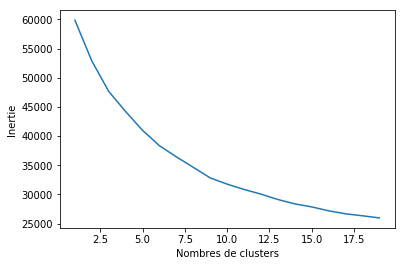

In [14]:
#Clustering
#Centrer et reduire les données 
opt_scaled = preprocessing.scale(opt, axis = 1)
opt_scaled = opt_scaled[:,0:64]
#Kmeans process
Km = KMeans(n_clusters = 10, n_init = 20)
Km.fit(opt_scaled)

#Km coordonnées
label = Km.labels_
centroids = Km.cluster_centers_
print(centroids.shape)
print("score :{}" .format(Km.score(opt_scaled)))

inertia = []
k = range(1,20) 
for i in k :
    model = KMeans(n_clusters = i)
    model.fit(opt_scaled)
    inertia.append(-model.score(opt_scaled))

plt.plot(k,inertia)
plt.xlabel('Nombres de clusters')
plt.ylabel('Inertie')

plt.savefig('clusters.png')

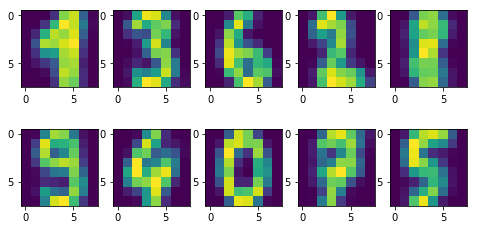

In [15]:
#Chaque centroid est un nombre en 64 pixel

centers = centroids.reshape(10,8,8)
plt.figure(figsize=(8,4))
for k in range(1,11) : 
    plt.subplot(2,5,k)
    plt.imshow(centers[k-1,:,:])

plt.savefig('chiffres.png')

Accuracy: 0.79


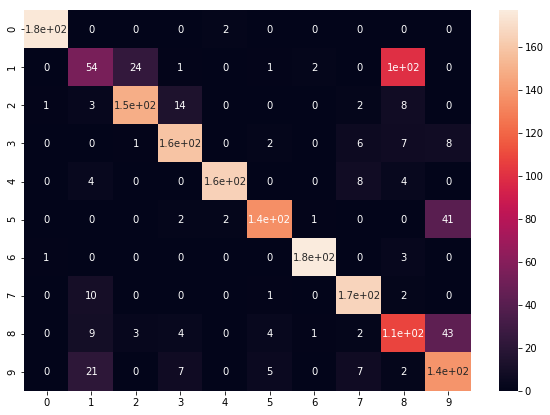

In [16]:
#Efficacité clustering 

clusters = Km.fit_predict(opt_scaled)
labels = opt['0.29']
pred_labels = np.zeros_like(clusters)
pred_labels10 = pred_labels

for i in range(10):
    mask = ( clusters == i)
    pred_labels[mask] = mode(labels[mask])[0]

print("Accuracy: %.2f" % metrics.accuracy_score(labels, pred_labels))


plt.figure(figsize=(10,7))
M = confusion_matrix(labels,pred_labels)
sns.heatmap(M, annot =True)

plt.savefig('heatmapscaledigit.png')



Rang de l'axe principal tel que 95% de l'information est retenu : 28


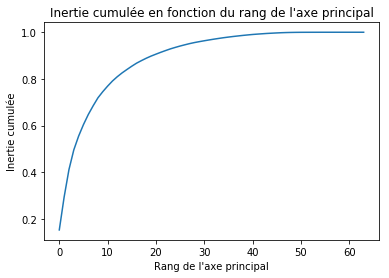

In [17]:
#ACP pour diminuer le la quantité d'information

acp = PCA(n_components = 64)
acp.fit(opt_scaled)
plt.plot(np.cumsum(acp.explained_variance_ratio_))
plt.title("Inertie cumulée en fonction du rang de l'axe principal")
plt.ylabel('Inertie cumulée')
plt.xlabel("Rang de l'axe principal")

i = 0
rang = 0
while rang < 0.95:
    rang = np.cumsum(acp.explained_variance_ratio_)[i]
    i = i+1

print("Rang de l'axe principal tel que 95% de l'information est retenu : {}" .format(i))

plt.savefig('acpdigit.png')